# Chapter 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')

In [3]:
#the % defaulted
df['default payment next month'].mean()

0.2217971797179718

In [4]:
#Confirm the number of cases in each class
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
#Instantiate the object
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [7]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                              intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,
                              penalty='l2', random_state=None, solver='warn', tol=0.0001, verbose=0,
                              warm_start=False)

In [8]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
#First 10 values of a feature 
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [10]:
#First 10 values of the response variable 
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
#Fit ourlogic regression
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
#New variable
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [13]:
#Predections on the new features
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#True labels of the predictions
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [15]:
#Creating random, uniformly distributed numbers with numpy
np.random.seed(seed=1)

X = np.random.uniform(low=0.0, high=10.0, size=(1000,))

X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

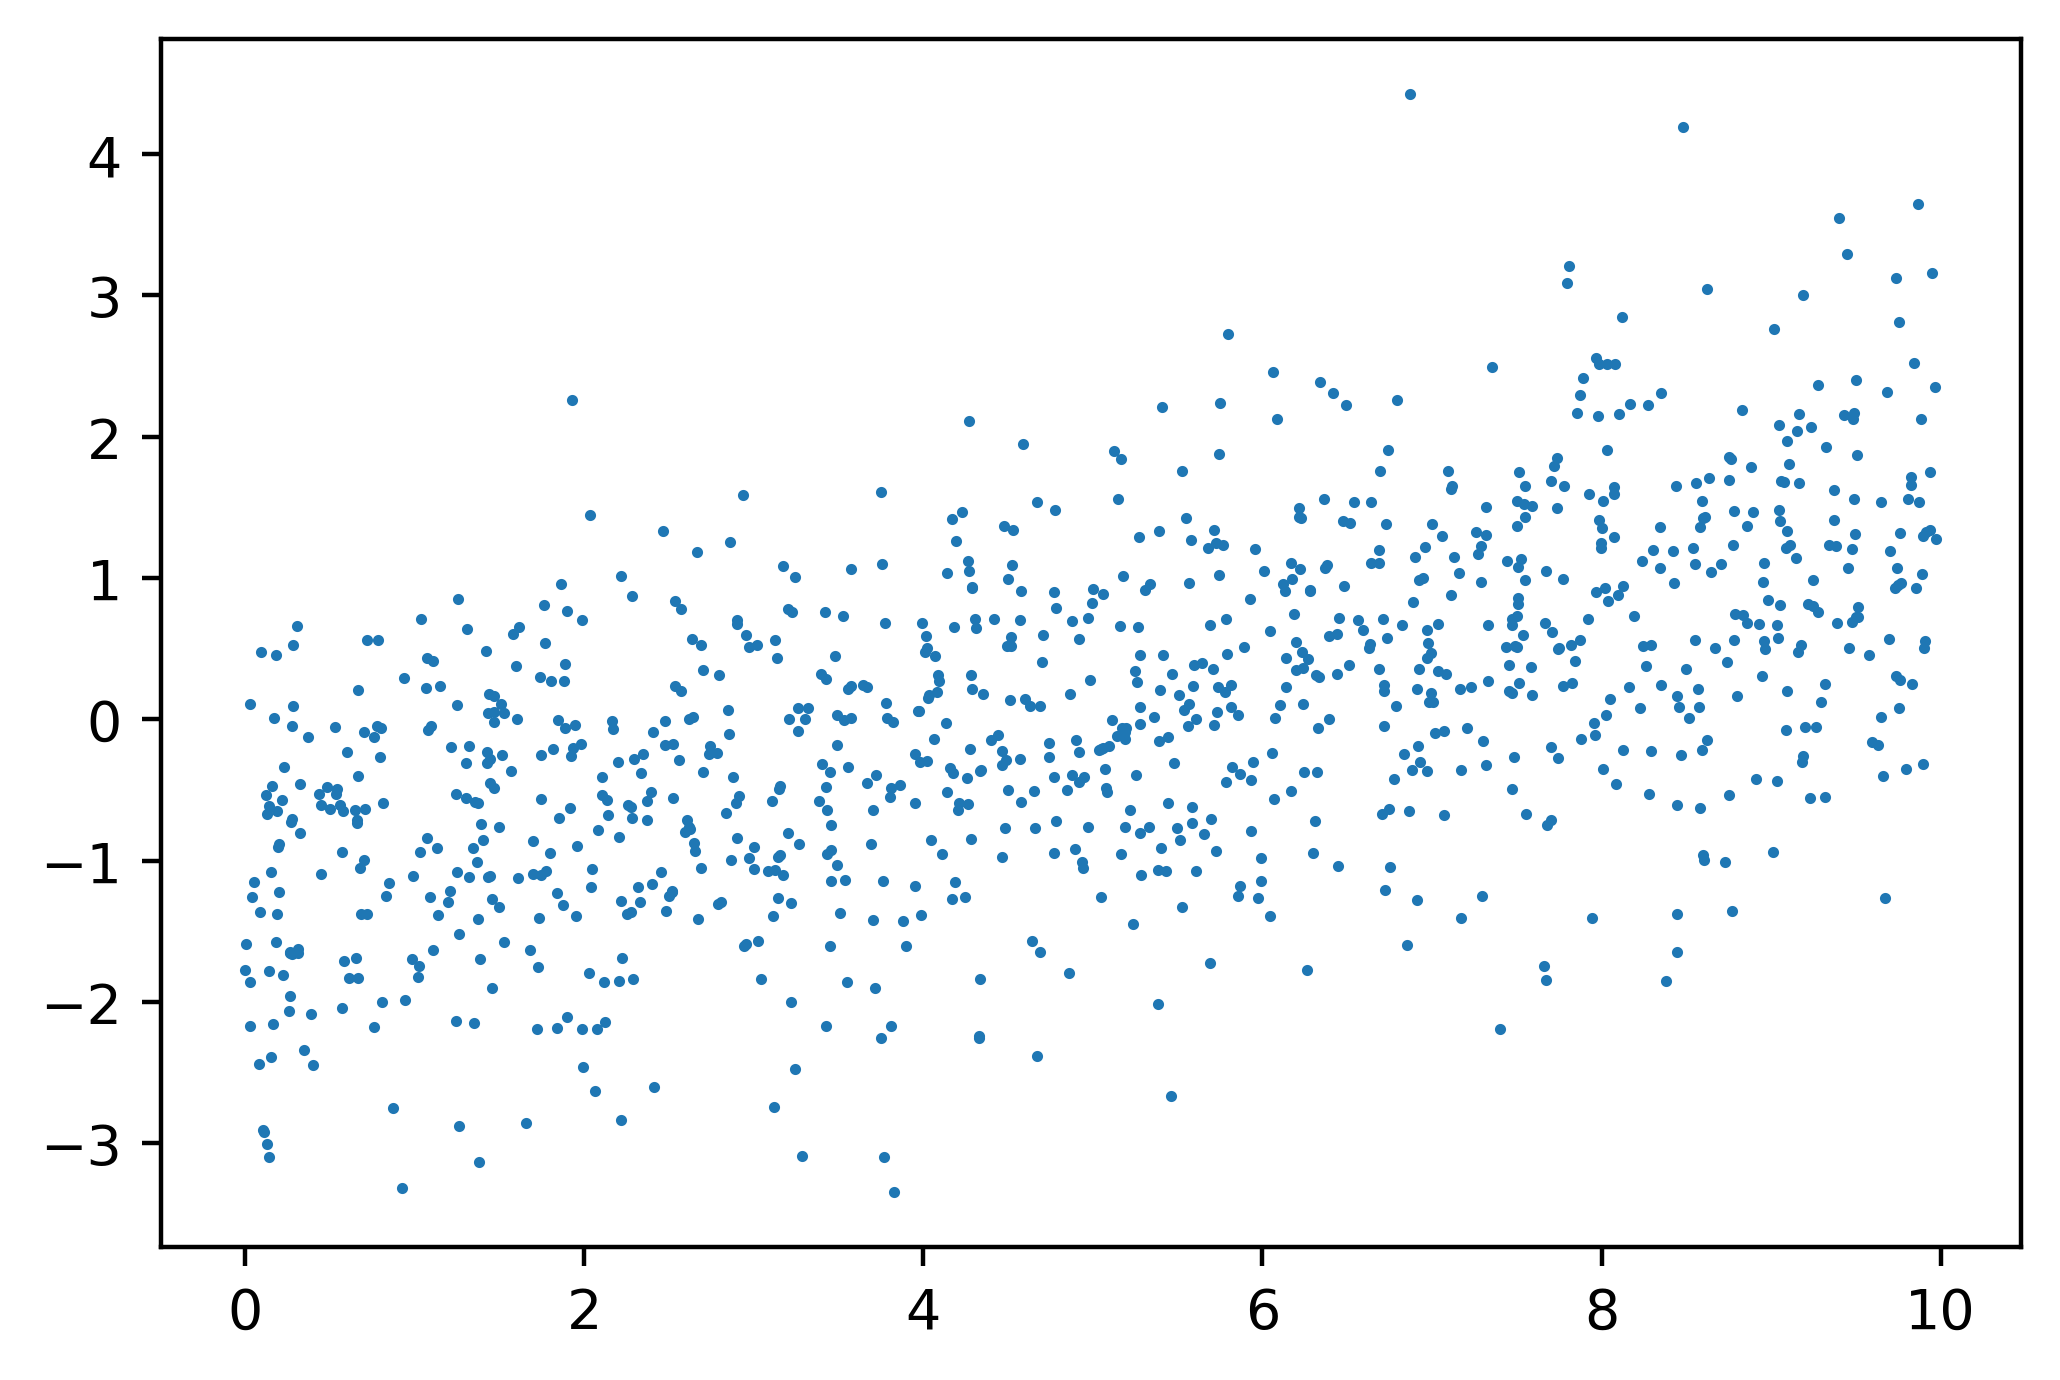

In [16]:
#Plot the noisey linear relationship
np.random.seed(seed=1)

slope = 0.25

intercept = -1.25

y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

mpl.rcParams['figure.dpi'] = 400

plt.scatter(X,y,s=1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [19]:
#Fitting the regression and examing the parameters 
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression()

In [20]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


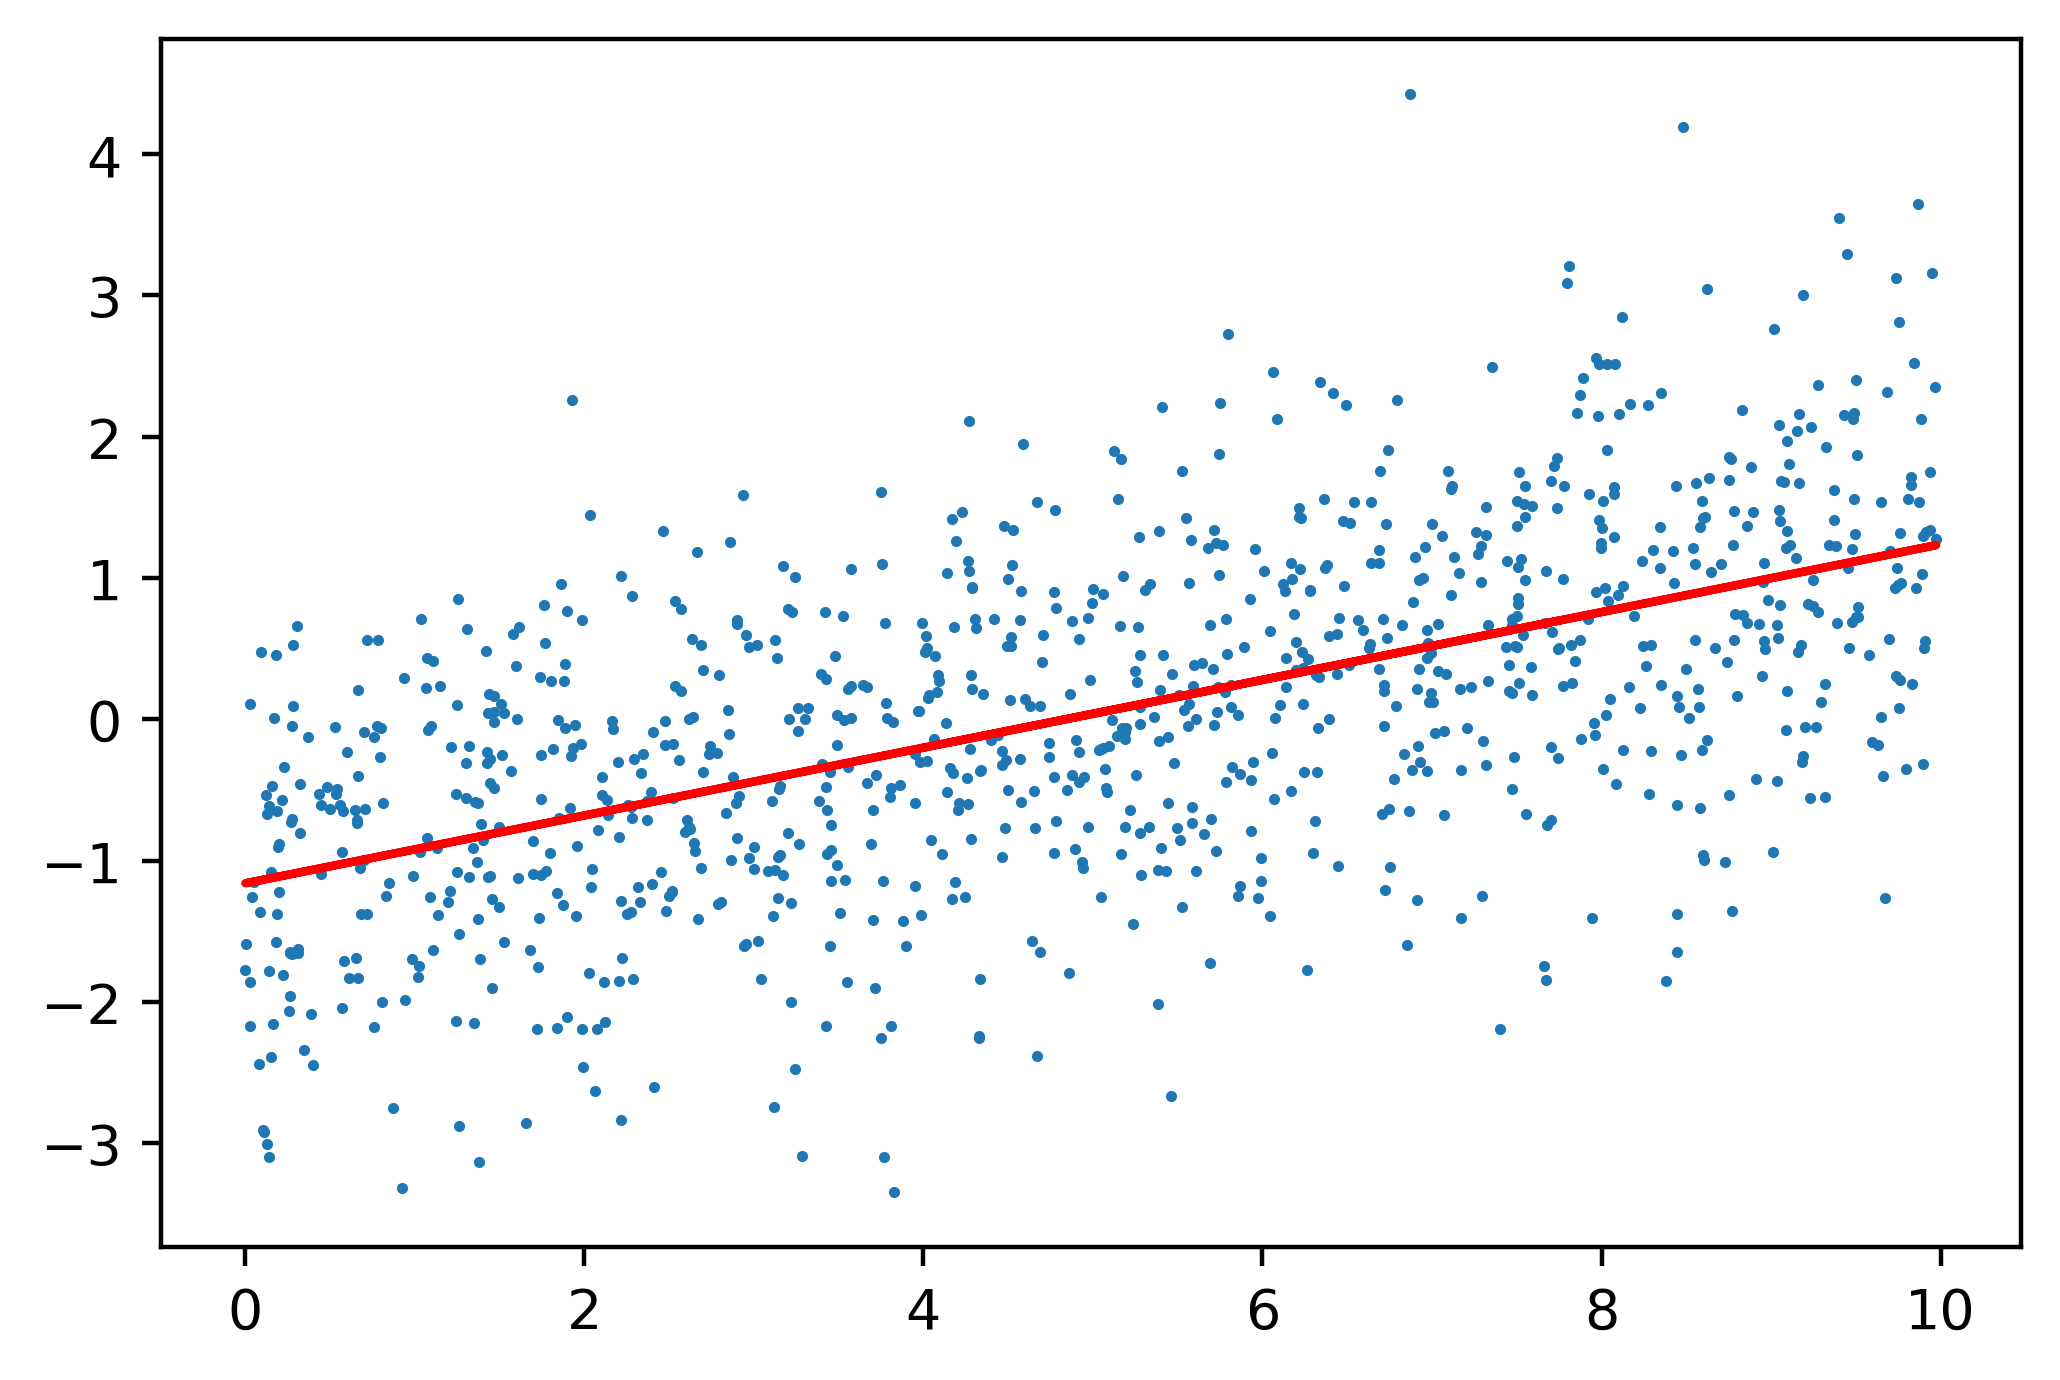

In [21]:
y_pred = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
np.mean(y_train)

0.223102526838873

In [27]:
np.mean(y_test)

0.21657603600225014